# Exercises for linear regression

In [2]:
## importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt


## Exercise 0

,X,y
0,99.119487,249.958707
1,50.657303,152.573856
2,78.591032,187.772243
3,188.804560,313.400678
4,69.894379,179.097959
...,...,...
395,146.826266,344.584521
396,63.651425,113.954422
397,1.181756,0.833932
398,33.988446,14.367083


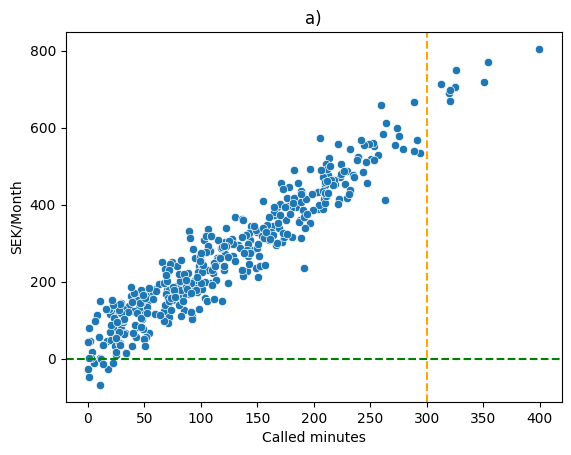

In [3]:
## a) 

seed =  42

# Generate simulated data
x = np.random.normal(100,100, 400)
x = np.absolute(x)
# Generate 
E = np.random.normal(0, 50, 400)

data = {"X" : x, "y": (x*2 + 25 + E)}
df  = pd.DataFrame(data)

display(df)
ax = sns.scatterplot(df, y="y", x="X")
ax.set(title="a)", ylabel="SEK/Month", xlabel="Called minutes")

ax = plt.axhline(0, color="green", linestyle= "dashed")
ax = plt.axvline(300, color="orange", linestyle= "dashed")

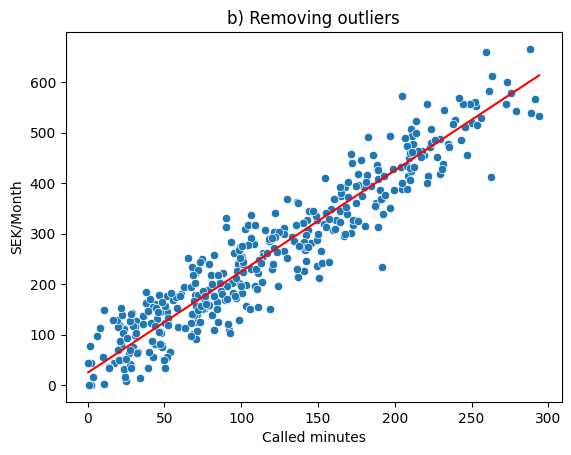

In [4]:
## b) 


## Dropping negative costs.
df.drop(df.loc[df["y"] < 0].index, inplace=True)

## Drop every call over 300 min
df.drop(df.loc[df["X"] > 300].index, inplace=True)

## Plot the new plot
ax = sns.scatterplot(df, x="X", y = "y")
ax.set(title="b) Removing outliers", ylabel="SEK/Month", xlabel="Called minutes")



## Calculate y_hat with given values for B1,B0
beta_0 = 25
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x
ax = sns.lineplot(df, x="X", y=y_hat(df["X"]), color="red")


In [5]:
## X = Minutes, Y = Cost in SEK/Month
df.head()
df["X"]

0       99.119487
1       50.657303
2       78.591032
3      188.804560
4       69.894379
          ...    
394    142.469680
395    146.826266
396     63.651425
397      1.181756
398     33.988446
Name: X, Length: 383, dtype: float64

##  1.  Train, test split


In [9]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction= 0.7, random_state=42, replace=False):
    
    X_train = X.sample(n=int(len(X)*train_fraction), random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)

    y_train = y.sample(n=int(len(y)*train_fraction), random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)


    return(X_train, X_test, y_train, y_test)
    

train_test_split(df["X"], df["y"])



(279    182.340614
 260    123.648944
 331     70.161038
 344    230.958870
 58     205.023430
           ...    
 42     100.487906
 308      0.371383
 215     19.003117
 264    175.969644
 330     13.625224
 Name: X, Length: 268, dtype: float64,
 1       50.657303
 4       69.894379
 8       43.749158
 13      36.172778
 14     144.318962
           ...    
 389     93.330100
 392     68.903574
 396     63.651425
 397      1.181756
 398     33.988446
 Name: X, Length: 115, dtype: float64,
 279    490.877115
 260    264.383121
 331    201.697919
 344    427.917018
 58     572.528783
           ...    
 42     253.224518
 308     43.441084
 215    129.045170
 264    395.877403
 330     36.422069
 Name: y, Length: 268, dtype: float64,
 1      152.573856
 4      179.097959
 8       82.424195
 13     137.008492
 14     345.539808
           ...    
 389    283.571067
 392    217.553134
 396    113.954422
 397      0.833932
 398     14.367083
 Name: y, Length: 115, dtype: float64)